In [1]:
import pandas as pd
import re
import nltk
from nltk import bigrams , trigrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK data files
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Define stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [4]:
def preprocessor(text):
    tokens = []  # Initialize tokens as an empty list
    try:
        text = text.lower()
        text = re.sub(r"http\S+", "", text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z\s]', "", text)  # Remove non-alphabet characters
        tokens = word_tokenize(text)  # Tokenize text
        tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    except Exception as e:
        print(f"Error processing text: {text} - {e}")
    return tokens


In [5]:
df_train["tokens"] = df_train["crimeaditionalinfo"].apply(preprocessor)
df_test["tokens"] = df_test["crimeaditionalinfo"].apply(preprocessor)

Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'float' object has no attribute 'lower'
Error processing text: nan - 'floa

In [6]:
df_train

,category,sub_category,crimeaditionalinfo,tokens
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,"[continue, received, random, call, abusive, me..."
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,"[fraudster, continuously, messaging, asking, p..."
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,"[acting, like, police, demanding, money, addin..."
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,"[apna, job, applied, job, interview, telecalli..."
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,"[received, call, lady, stating, send, new, pho..."
...,...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...,"[identity, theft, smishing, sm, fraud, creditd..."
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,"[received, call, number, asking, phone, pay, c..."
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...,"[cyber, stalking, blackmailing, phonesmsvoip, ..."
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...,"[call, karke, bola, ki, aapka, lotary, laga, h..."


In [7]:
all=[word for tokens in df_train["tokens"] for word in tokens]

In [8]:
freq=Counter(all)

In [9]:
comm_words=freq.most_common(15)

In [10]:
all_bigrams=list(bigrams(all))
all_bigrams=Counter(all_bigrams)
all_trigrams=list(trigrams(all))
all_trigrams=Counter(all_trigrams)

In [11]:
comm_bi=all_bigrams.most_common(15)
comm_tri=all_trigrams.most_common(15)

In [12]:
word_df = pd.DataFrame(comm_words, columns=['Word', 'Frequency'])
bigram_df = pd.DataFrame(comm_bi, columns=['Bigram', 'Frequency'])
trigram_df = pd.DataFrame(comm_tri, columns=['Trigram', 'Frequency'])


C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\2291197200.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')


Text(0, 0.5, 'Words')

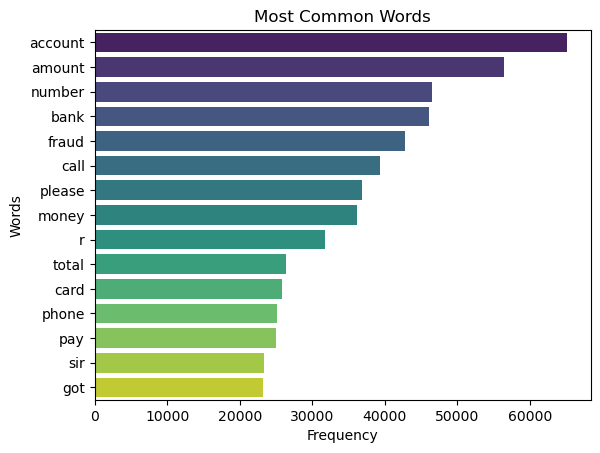

In [13]:
sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')
plt.title('Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\270730805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


Text(0, 0.5, 'Bigrams')

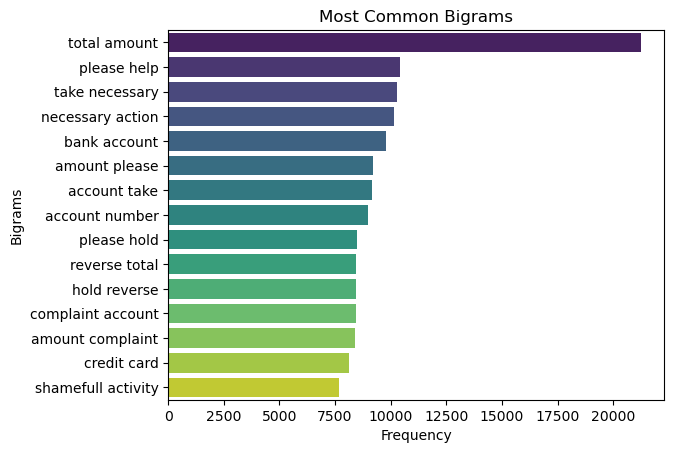

In [14]:
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')
plt.title('Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')


C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\979901232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


Text(0, 0.5, 'Trigrams')

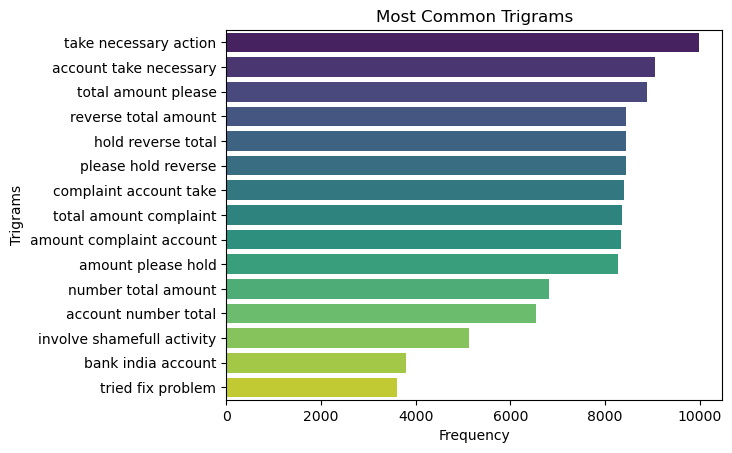

In [15]:
trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: ' '.join(x))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')
plt.title('Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')


C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


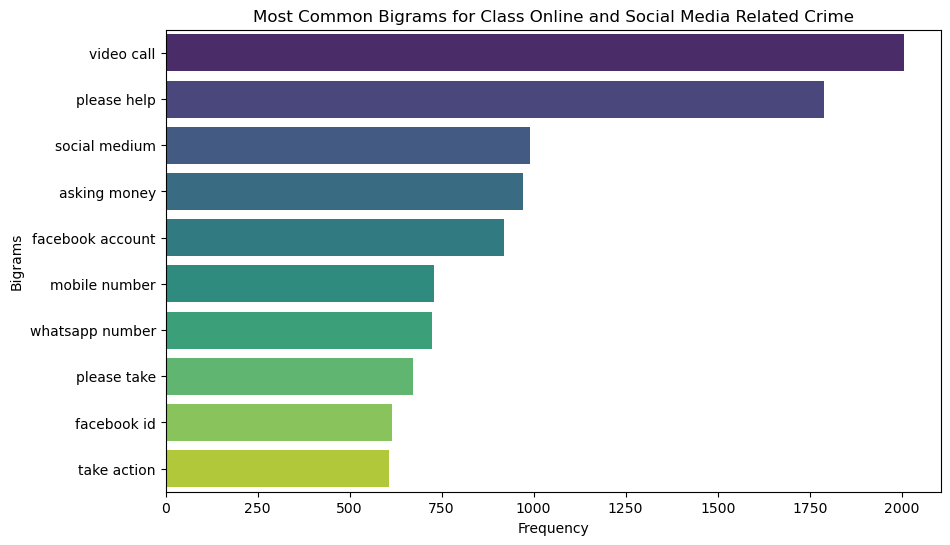

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


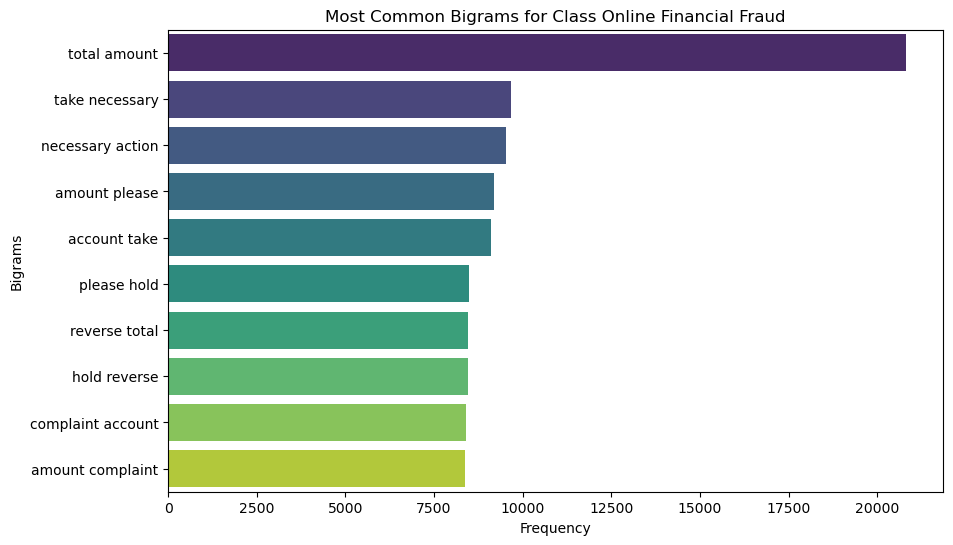

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


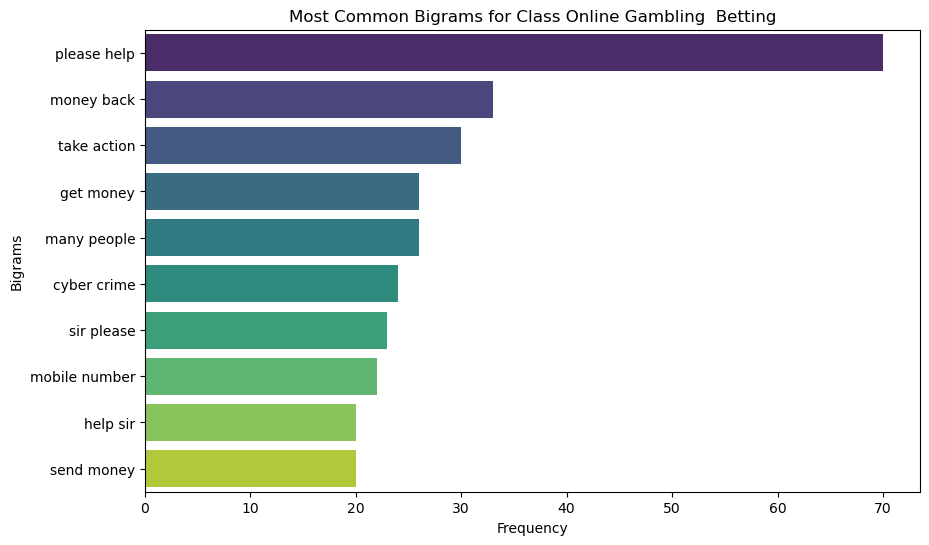

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


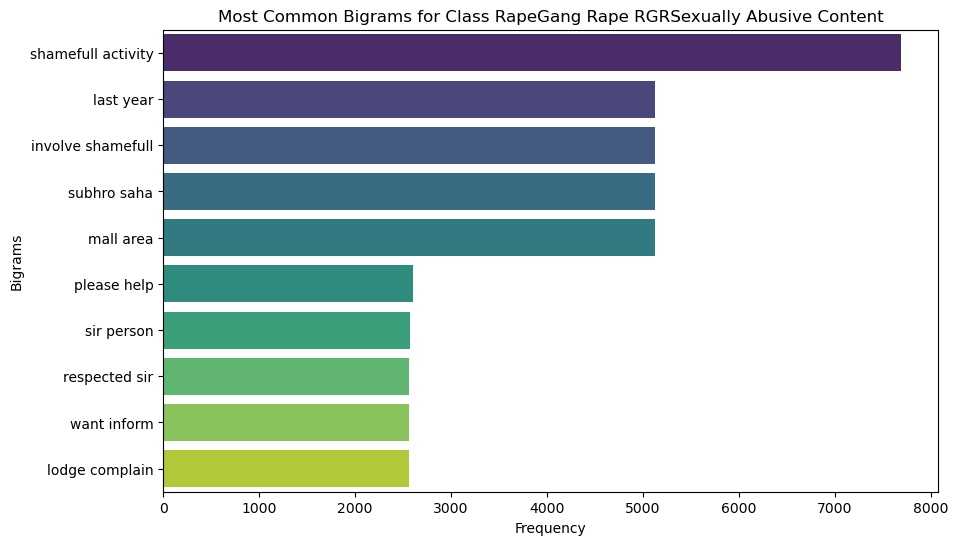

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


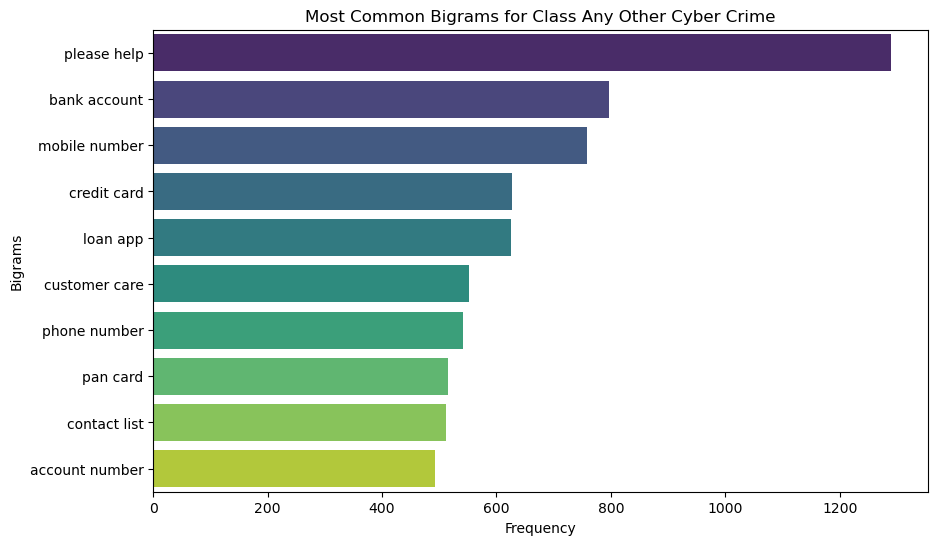

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


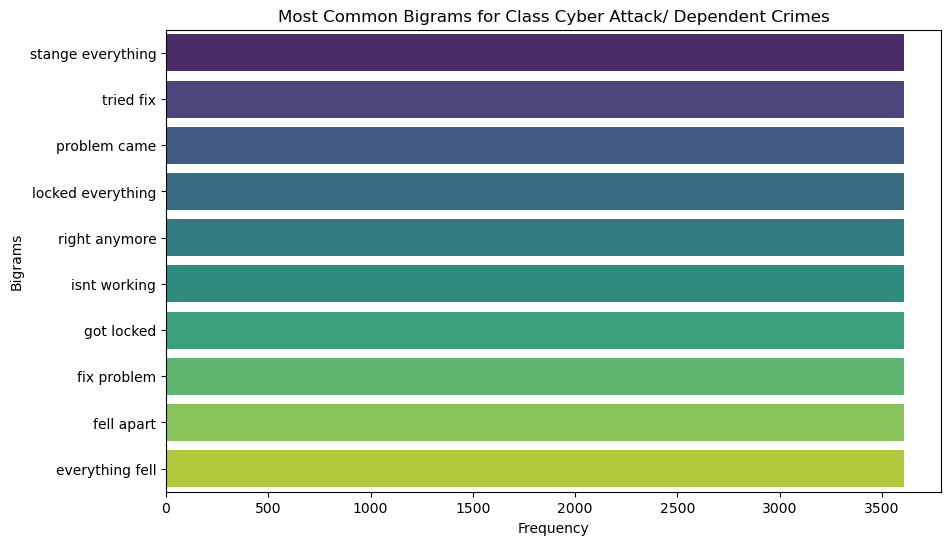

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


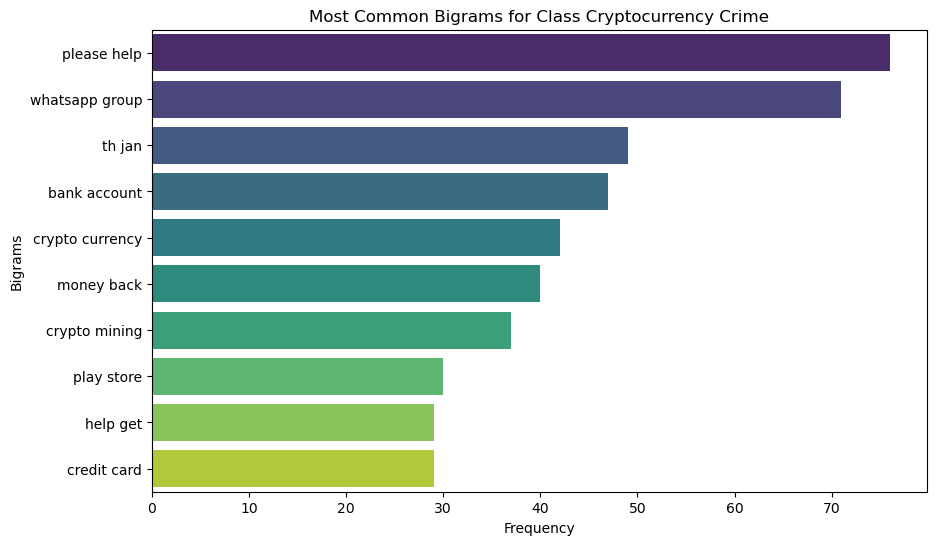

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


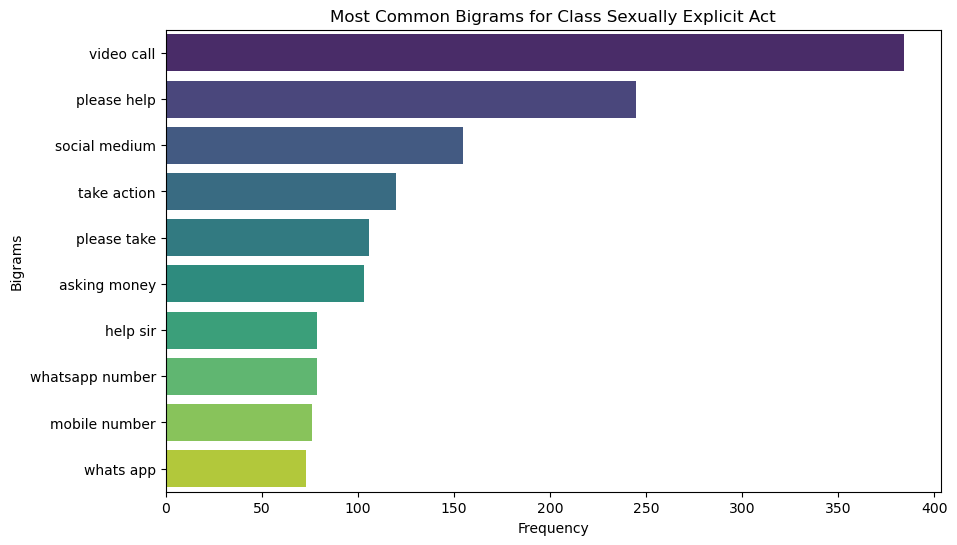

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


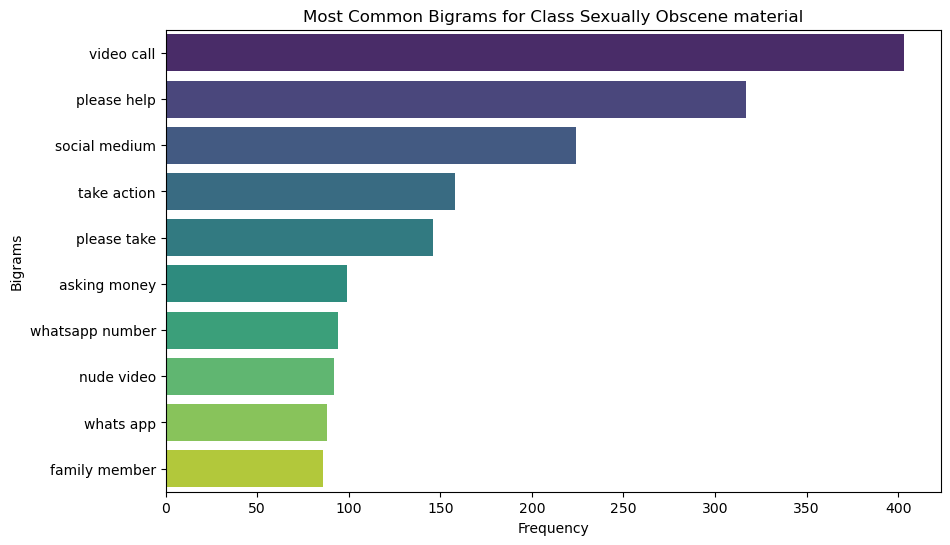

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


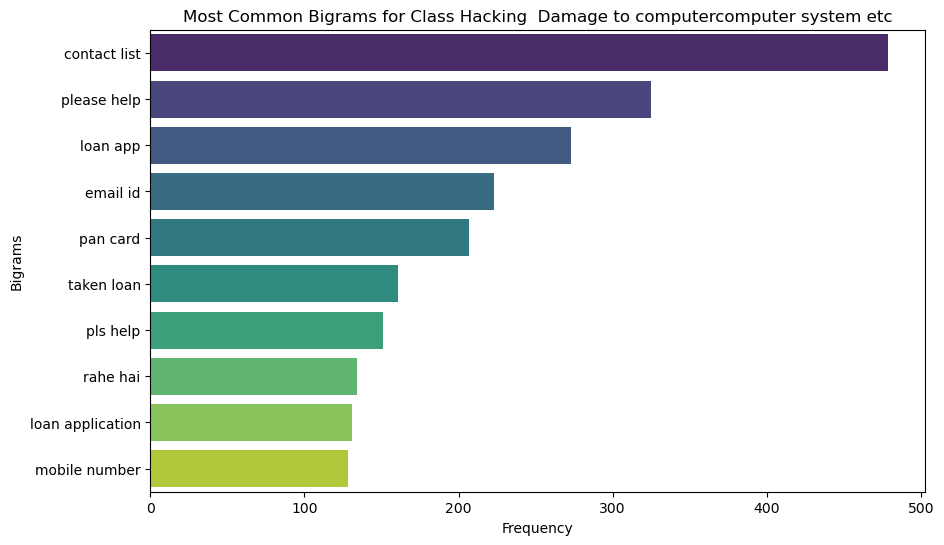

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


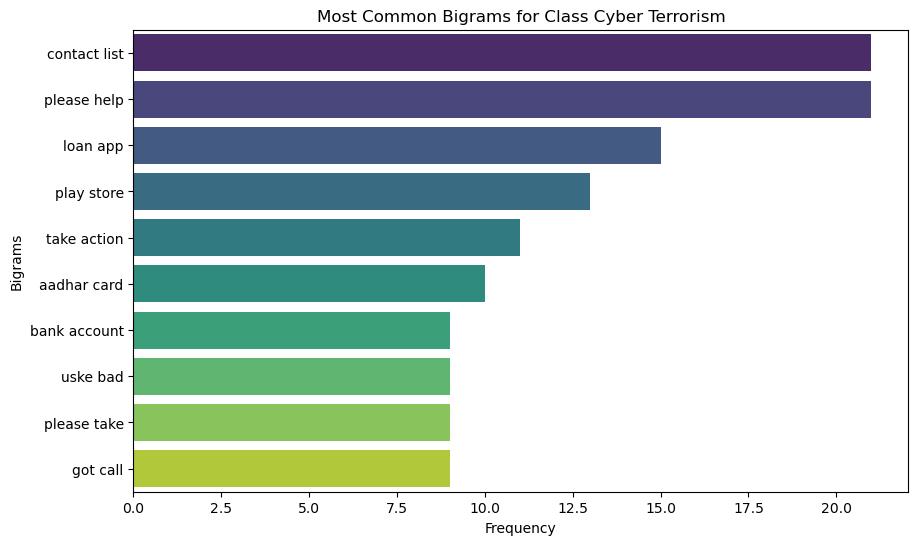

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


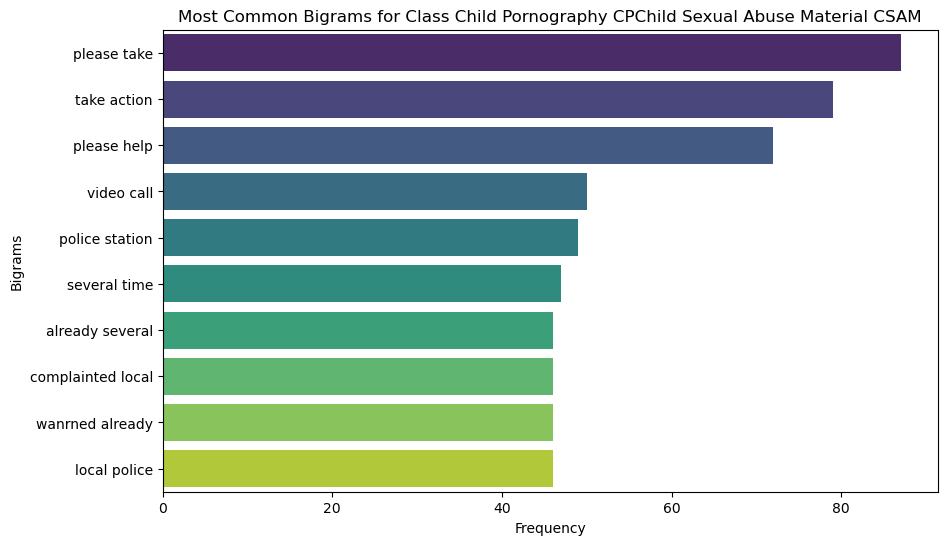

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


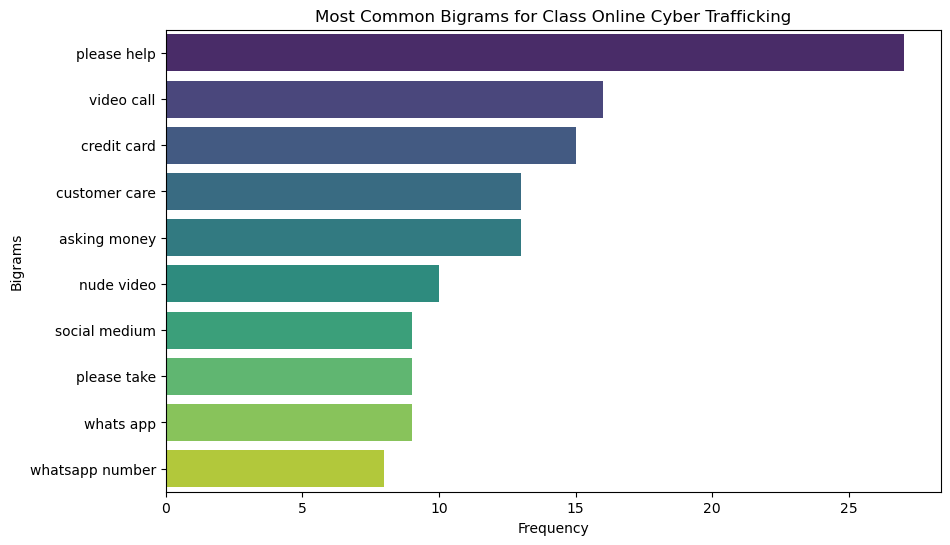

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


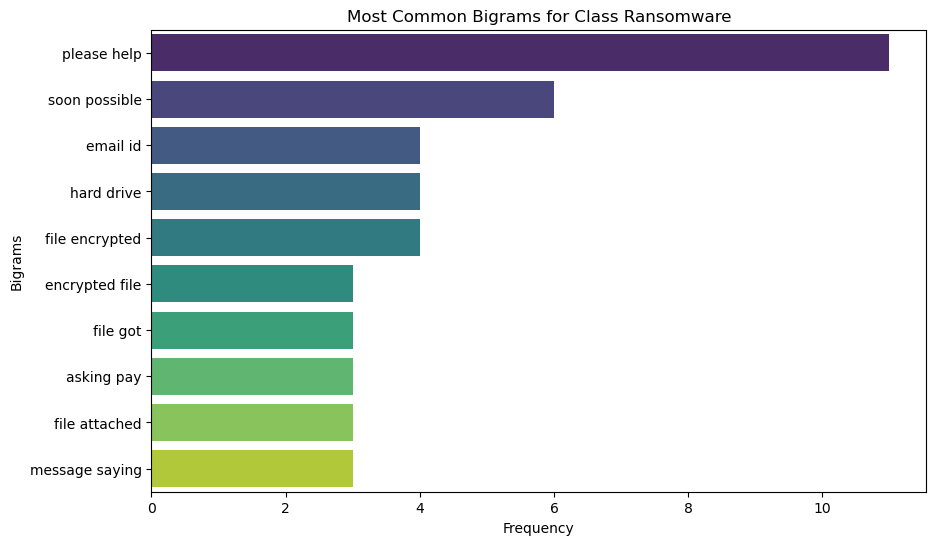

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\609479136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')


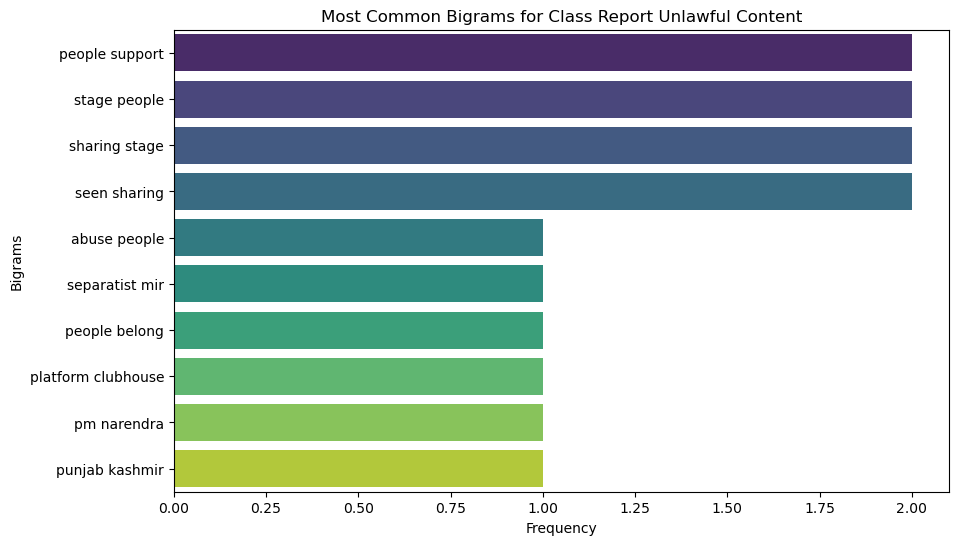

In [16]:
# Join tokens back into a single string for each row in 'tokens' column
df_train["text_tokens"] = df_train["tokens"].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)

# Loop through each class in the data
for category in df_train['category'].unique():
    # Filter the dataframe for each specific class
    class_df = df_train[df_train['category'] == category]
    
    # Generate bigrams for the class
    vectorizer = CountVectorizer(ngram_range=(2, 2))  # Set ngram range to bigrams
    bigrams = vectorizer.fit_transform(class_df["text_tokens"])
    bigram_counts = bigrams.sum(axis=0).A1
    bigram_words = vectorizer.get_feature_names_out()
    
    # Create a DataFrame with the bigrams and their counts
    bigram_df = pd.DataFrame({'Bigram': bigram_words, 'Frequency': bigram_counts})
    bigram_df = bigram_df.sort_values(by='Frequency', ascending=False).head(10)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')
    plt.title(f'Most Common Bigrams for Class {category}')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()


C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


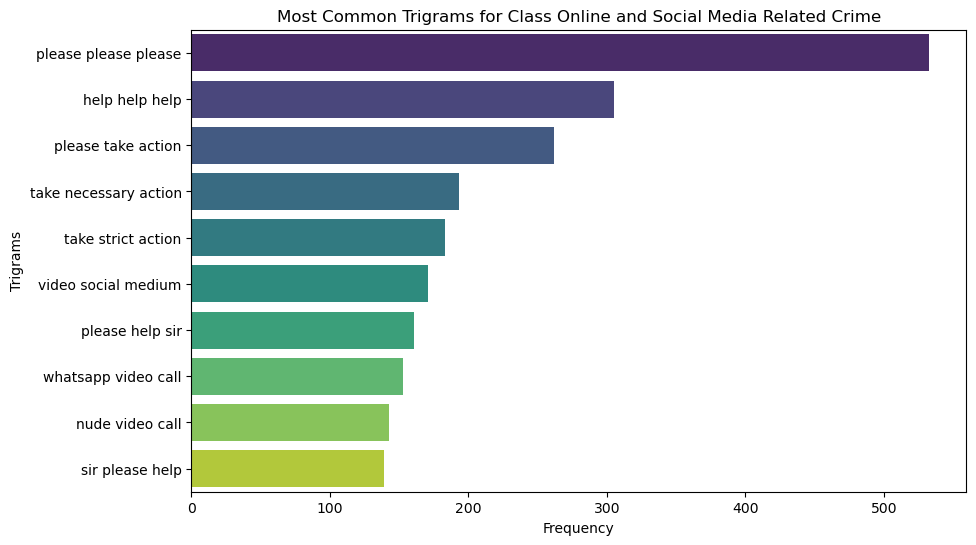

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


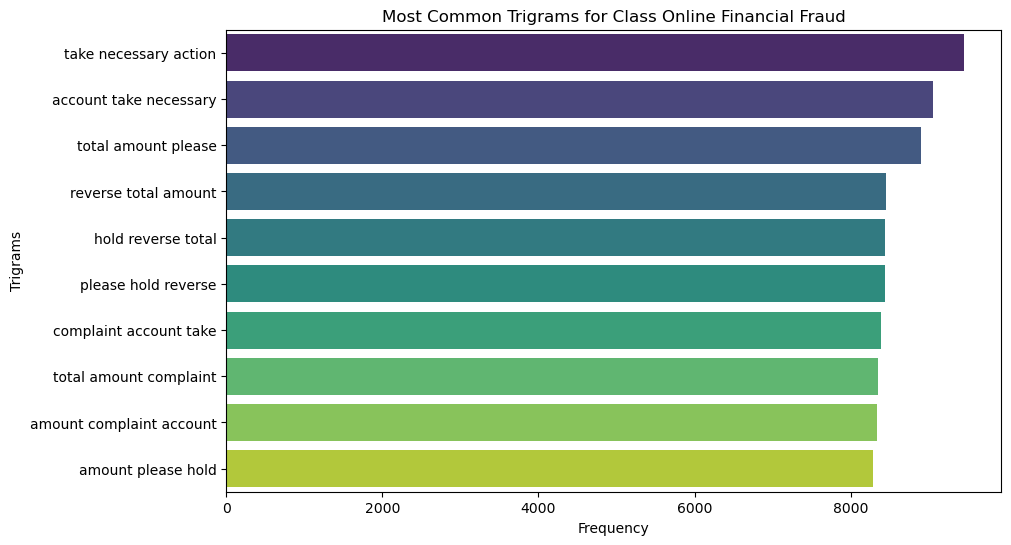

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


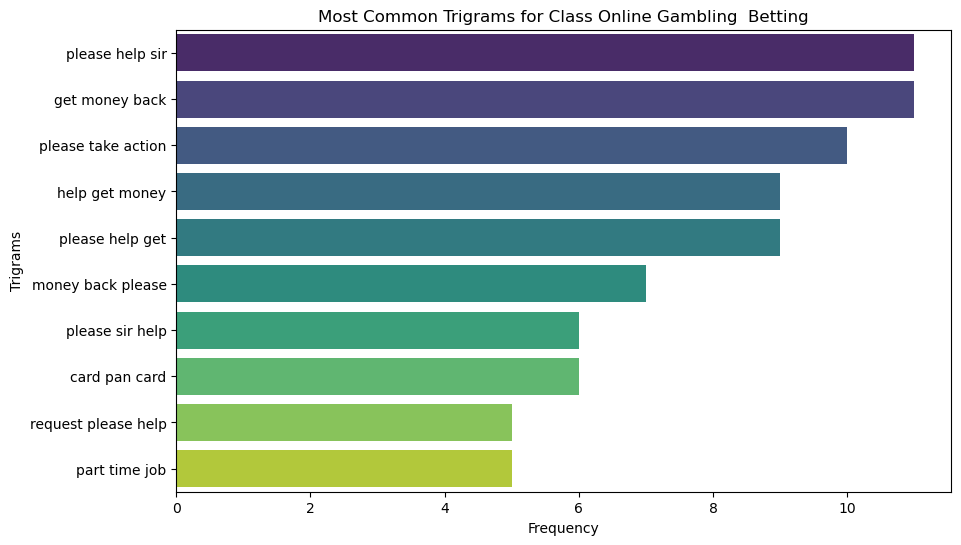

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


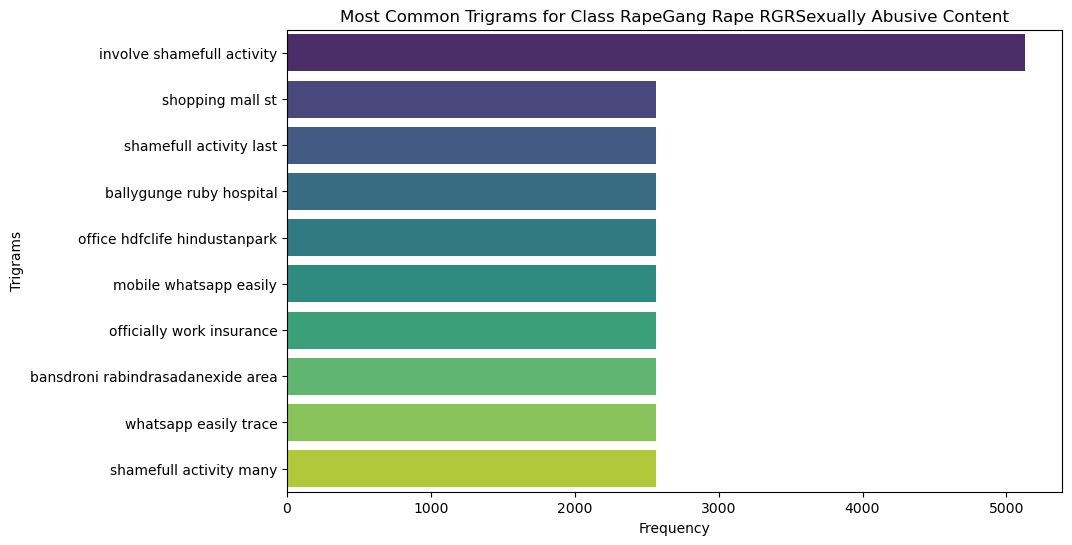

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


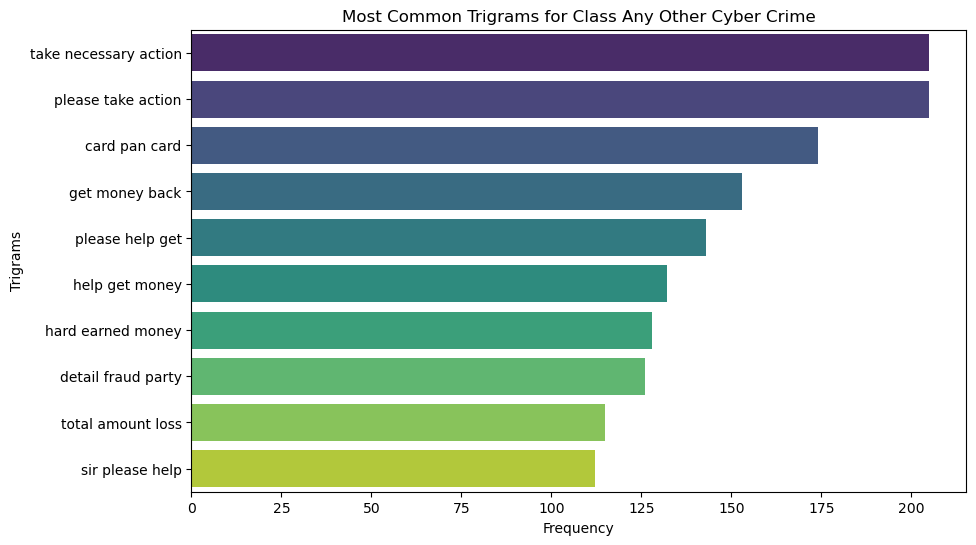

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


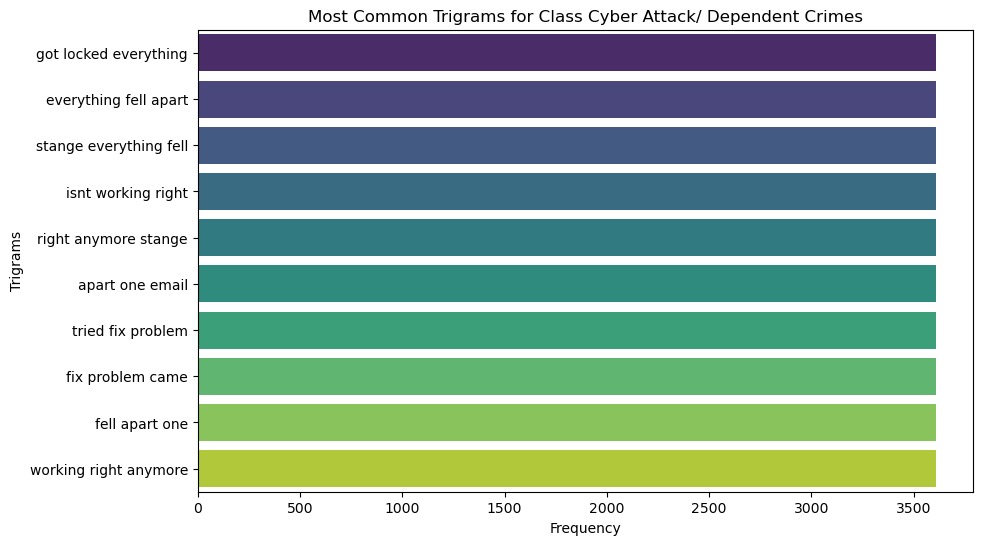

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


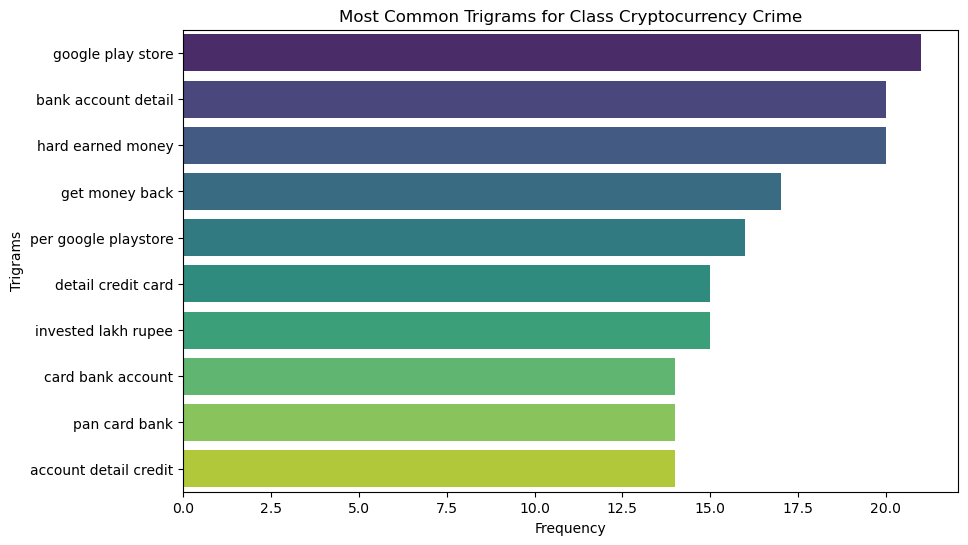

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


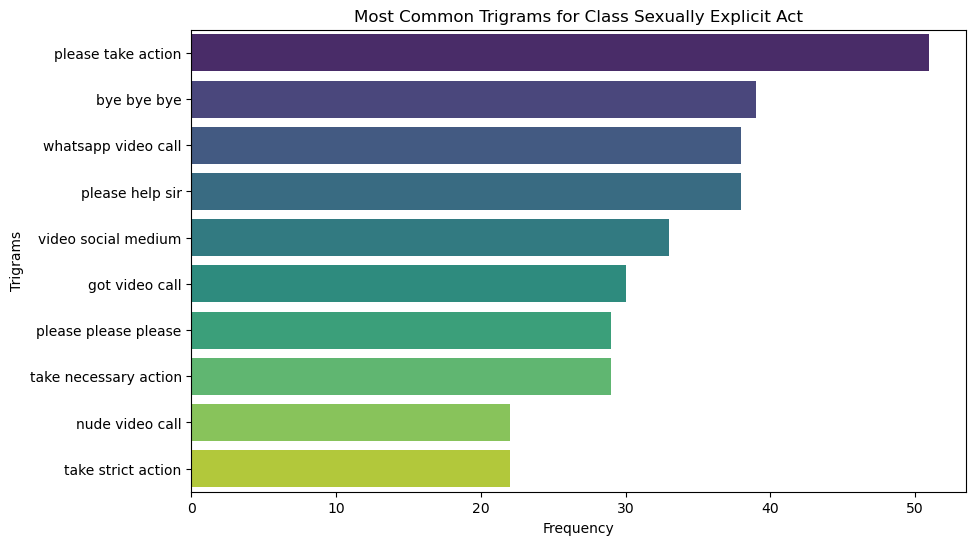

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


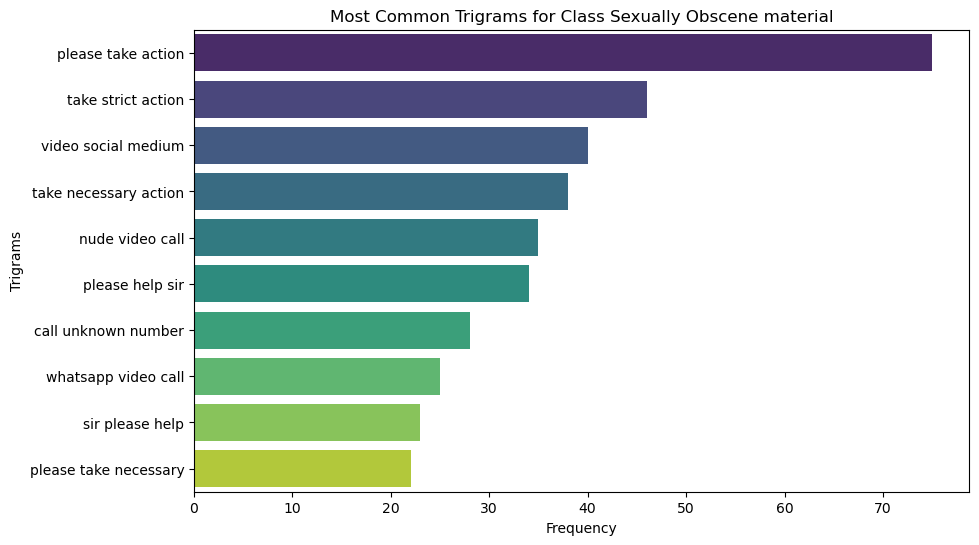

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


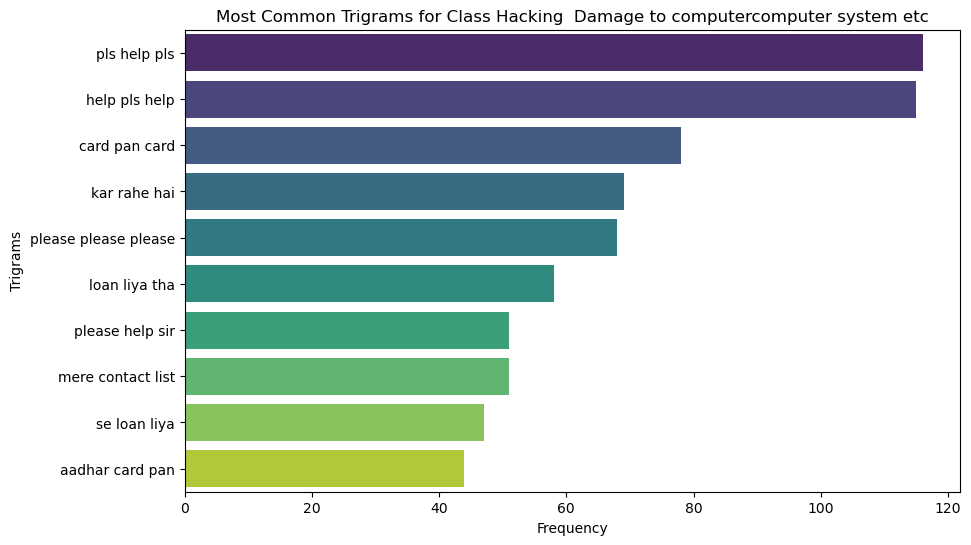

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


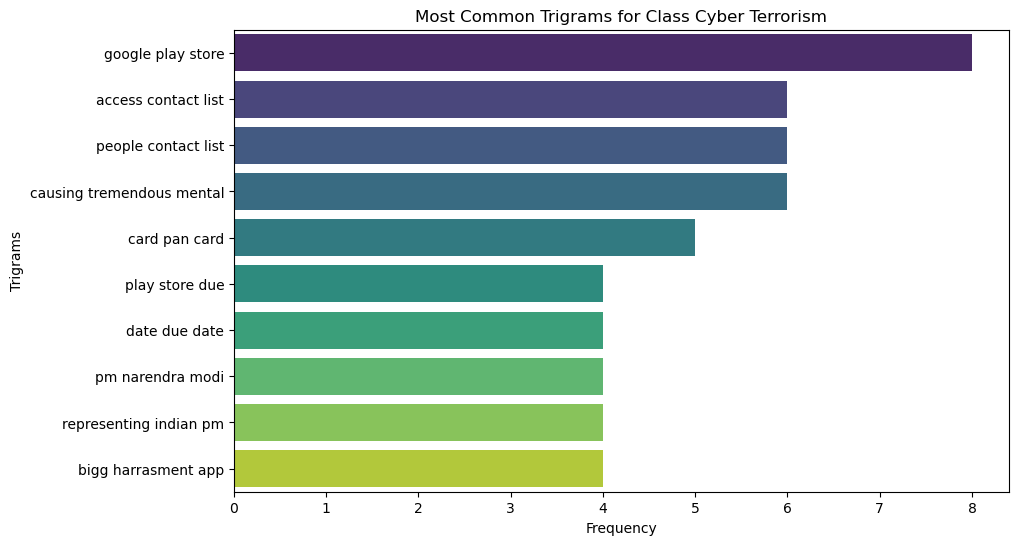

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


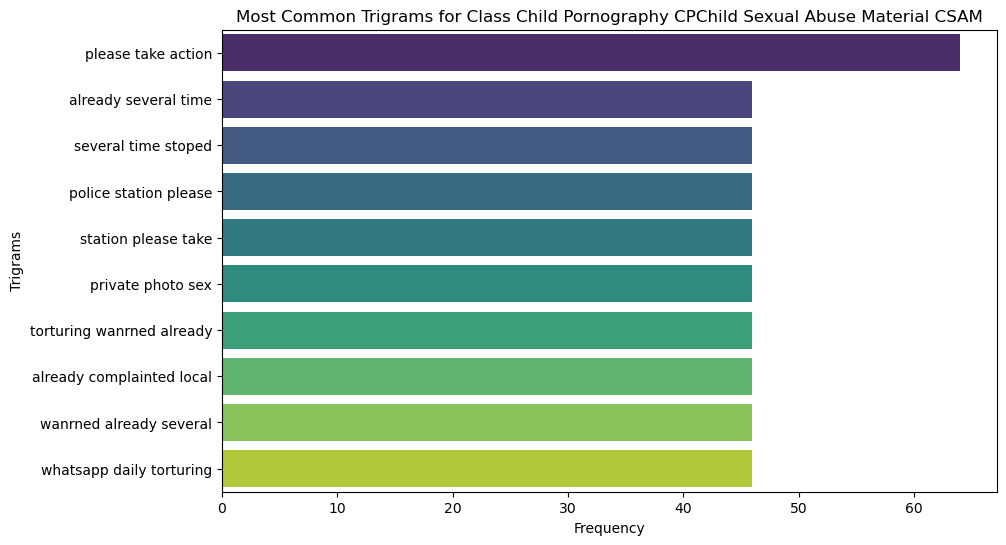

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


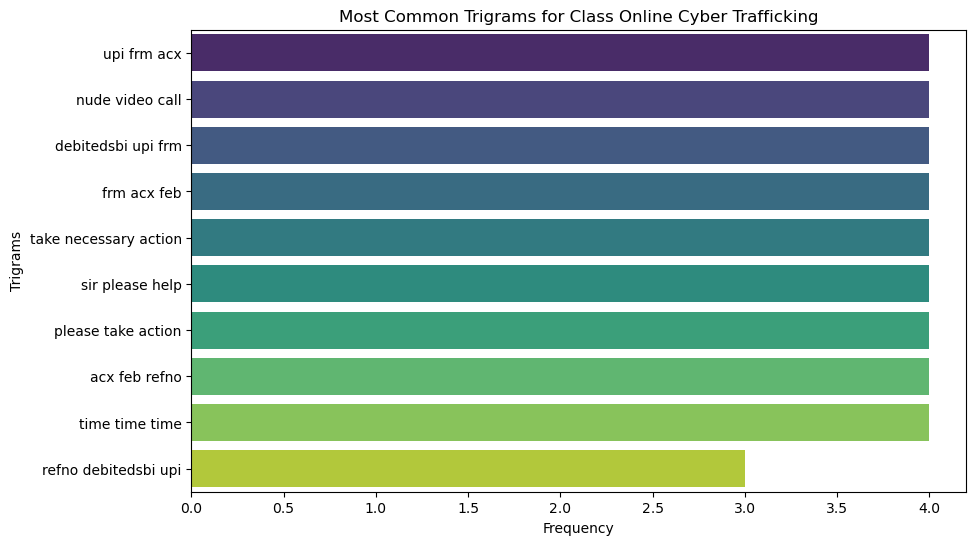

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


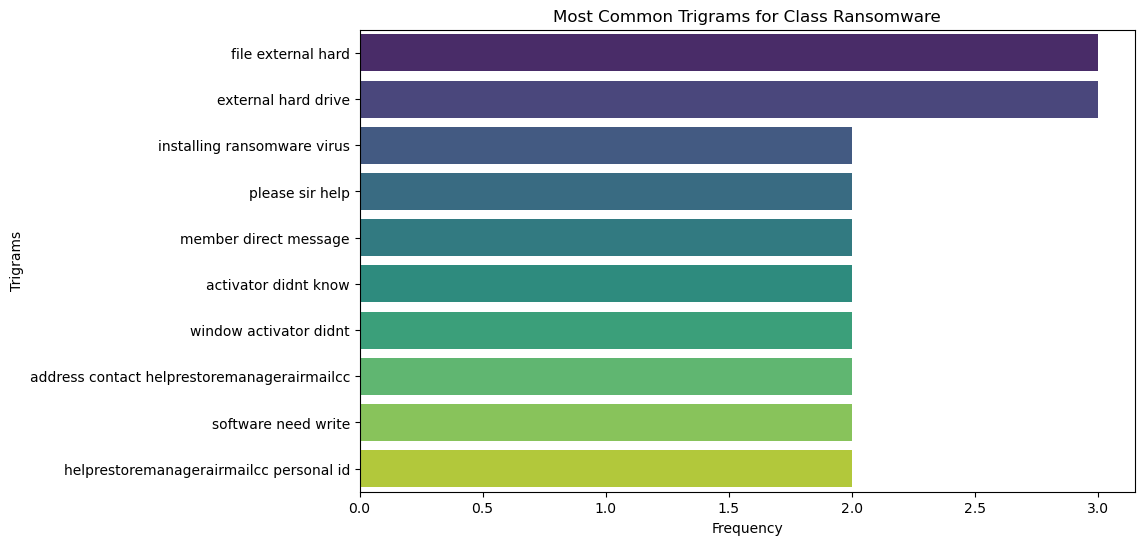

C:\Users\ashvi\AppData\Local\Temp\ipykernel_5540\3598697319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')


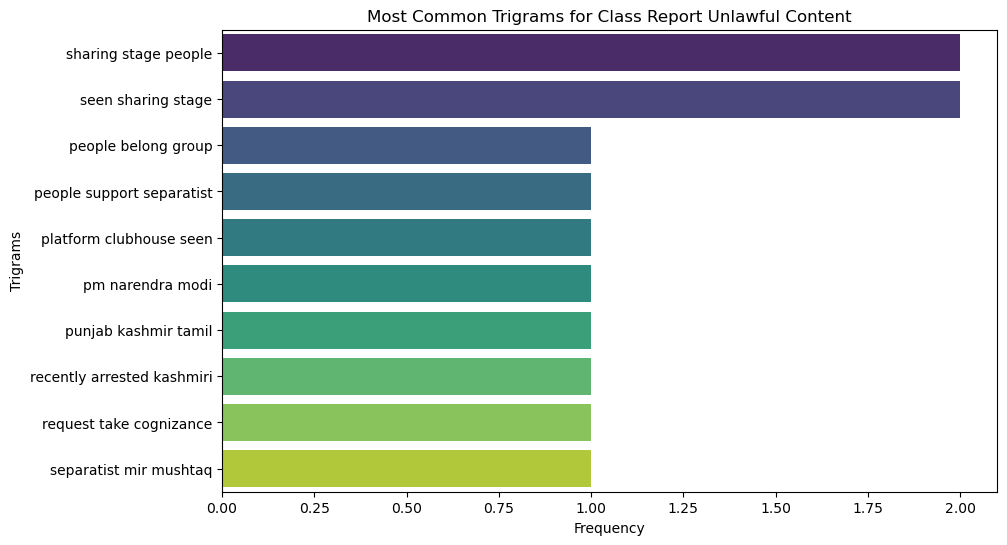

In [17]:
# Join tokens back into a single string for each row in 'tokens' column
df_train["text_tokens"] = df_train["tokens"].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)

# Loop through each class in the data
for category in df_train['category'].unique():
    # Filter the dataframe for each specific class
    class_df = df_train[df_train['category'] == category]
    
    # Generate trigrams for the class
    vectorizer = CountVectorizer(ngram_range=(3, 3))  # Set ngram range to trigrams
    trigrams = vectorizer.fit_transform(class_df["text_tokens"])
    trigram_counts = trigrams.sum(axis=0).A1
    trigram_words = vectorizer.get_feature_names_out()
    
    # Create a DataFrame with the trigrams and their counts
    trigram_df = pd.DataFrame({'Trigram': trigram_words, 'Frequency': trigram_counts})
    trigram_df = trigram_df.sort_values(by='Frequency', ascending=False).head(10)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')
    plt.title(f'Most Common Trigrams for Class {category}')
    plt.xlabel('Frequency')
    plt.ylabel('Trigrams')
    plt.show()
